In [5]:
%matplotlib inline
#import os
#import sys
import numpy as np
from matplotlib import pyplot as plt
#from scipy.ndimage import label
#from medpy.io import *
from medpy.filter import *
#from subprocess import *
import SimpleITK as sitk
import matplotlib.cm as cm
from scipy import stats
import skimage

In [2]:
image_data, image_header = load('./Documents/LIVER-SLIVER_Challenge/test/liver-orig001.mhd')
#print(check_output([image_data])).decode("utf8")

In [19]:
def region_grow(img, seed, minthr, maxthr, structure = None):
    img[seed] = minthr
    thrimg = (img < maxthr) & (img >= minthr)
    lmap, _ = label(thrimg, structure = structure)
    lids = numpy.unique(lmap[seed])
    region = numpy.zeros(img.shape, numpy.bool)
    for lid in lids:
        region |= lmap == lid
    return region


(502, 512, 512)


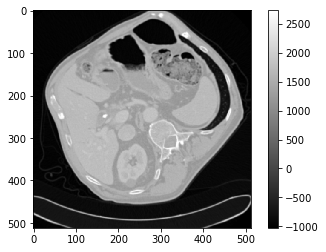

In [15]:
img = sitk.ReadImage("./Documents/LIVER-SLIVER_Challenge/test/liver-orig001.mhd")
data = sitk.GetArrayFromImage(img)
print data.shape
plt.imshow(data[356], cmap='gray'); plt.colorbar()
plt.imshow(data[356], cmap='gray', vmin=10, vmax=100)
vmin, vmax = stats.scoreatpercentile(data, (0.5, 99.5))
data = np.clip(data, vmin, vmax)
data = (data - vmin) / (vmax - vmin)
#plt.imshow(data[356], cmap='gray')
#print img
#print sitk.GetArrayFromImage(img)
#print img.GetSize()
#origin = np.array(list(reversed(img.GetOrigin())))
#output = sitk.GetImageFromArray(data)
#output.SetSpacing( img.GetSpacing() )
#output.SetOrigin( img.GetOrigin() )
#output.SetDirection( img.GetDirection() )
#print output
bilateral = anisotropic_diffusion(data, niter=3, kappa= 10, gamma = 0.1, voxelspacing = None, option = 1)
plt.imshow(bilateral[356], cmap='gray')

In [ ]:
imgSmooth = sitk.CurvatureFlow(image1=img, timeStep = 0.12, numberOfIterations=3)
#print imgSmooth
#sitk.Show(imgSmooth)
#plt.imshow(imgSmooth, cmap = cm.Greys_r);


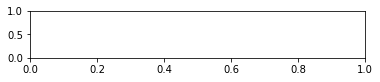

(0.0, 1.0, 0.0, 1.0)

In [42]:

plt.subplot(4,1,4)
plt.show(imgSmooth)
plt.axis("off")


In [43]:
sitk.Show(sitk.GetArrayFromImage(img))

TypeError: in method 'Show', argument 1 of type 'itk::simple::Image const &'

In [24]:
median = sitk.MedianImageFilter(img, Radius = 2)

TypeError: __init__() takes exactly 1 argument (3 given)

In [18]:
tempImage = sitk.ReadImage("./Documents/LIVER-SLIVER_Challenge/test/liver-orig001.mhd")
print('origin of original image:', tempImage.GetOrigin())
print('spacing of original image:', tempImage.GetSpacing())
castIF = sitk.CastImageFilter()
castIF.SetOutputPixelType(sitk.sitkFloat32)
masterImage = castIF.Execute(tempImage)
smoothIF = sitk.GradientAnisotropicDiffusionImageFilter()    
spacing = masterImage.GetSpacing()   
min_spacing = np.min(np.array(spacing))
smoothIF.SetTimeStep(min_spacing/(np.power(2, 4)))
smoothIF.SetNumberOfIterations(10)
smoothIF.SetConductanceParameter(10)
smoothImage = smoothIF.Execute(masterImage)
print tempImage
print smoothImage

('origin of original image:', (0.0, 0.0, 0.0))
('spacing of original image:', (0.7421879768371582, 0.7421879768371582, 0.7999879717826843))
Image (0x4260910)
  RTTI typeinfo:   itk::Image<short, 3u>
  Reference Count: 1
  Modified Time: 4644
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 4620
  UpdateMTime: 4643
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 502]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 502]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 502]
  Spacing: [0.742188, 0.742188, 0.799988]
  Origin: [0, 0, 0]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.742188 0 0
0 0.742188 0
0 0 0.799988

  PointToIndexMatrix: 
1.34737 0 0
0 1.34737 0
0 0 1.25002

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  Pi

In [ ]:
slice = np.array(smoothImage)
#slice[slice == -2000] = 0
plt.imshow(slice, cmap = plt.cm.gray)
plt.show()